In [18]:
import matplotlib.pyplot as plt
import json
import pandas as pd

# import JSON
with open('SQLDB_results.json') as json_file:
    results = json.load(json_file)

In [19]:
# Create DataFrame
df = pd.DataFrame(results)

In [20]:
# Drop the QueryString, as this column has no value for the statistical analysis. It was recorded for historization purposes and to make the results traceable
df = df.drop(columns='QueryString')
# Queries that have returned 0 rows might skewers the results, as there is no guarantee, the Query was actually executed. Therefore these results are dropped.
df = df[df.NumberOfRowsReturned != 0]
# Drop Queries for Range 80, as they don't exist for every Amount of RowsInDataBase
df = df[df.QueryType != 'Range, 80']
df

,QueryType,Minimum,Maximum,Median,Mean,StandardDeviation,NumberOfRowsReturned,DatabaseSize,RowsInDataBase,EstimatedMonthlyCosts,NumberOfRuns
0,Point,13569.0,13903.0,13625.0,13660.2000,138.9288,1,GP_Gen5_2,10000000,339.15,5
1,Point,13541.0,13602.0,13546.0,13558.6000,25.8902,1,GP_Gen5_2,10000000,339.15,5
2,Point,13550.0,13632.0,13576.0,13581.0000,30.5778,1,GP_Gen5_2,10000000,339.15,5
3,"Range, 10",13543.0,13611.0,13573.0,13576.4000,30.1131,250,GP_Gen5_2,10000000,339.15,5
4,"Range, 10",13541.0,13709.0,13589.0,13617.6000,81.9134,250,GP_Gen5_2,10000000,339.15,5
...,...,...,...,...,...,...,...,...,...,...,...
136,"Range, 50",91983.0,92503.0,92048.0,92178.0000,283.3284,12500,GP_Gen5_2,100000000,339.15,3
137,"Range, 50",92103.0,92514.0,92223.0,92280.0000,211.3457,12500,GP_Gen5_2,100000000,339.15,3
141,Aggregate,91970.0,92269.0,92176.0,92138.3333,153.0174,1,GP_Gen5_2,100000000,339.15,3
142,Aggregate,91955.0,92468.0,92047.0,92156.6667,273.5184,1,GP_Gen5_2,100000000,339.15,3


In [21]:
# Next step is to aggregate the QueryTypes for each Scale
# Before there were 3 Queries, for each Querytype for each Databasesize, for each RowsInDataBase. Now there is only 1 aggregated.
df = df.groupby(['QueryType','DatabaseSize', 'RowsInDataBase','EstimatedMonthlyCosts'], as_index=False).agg(
    {
         'Median': 'mean',
         'Mean': 'mean',
         'Maximum': 'max',
         'Minimum': 'min',
    }
)
df

,QueryType,DatabaseSize,RowsInDataBase,EstimatedMonthlyCosts,Median,Mean,Maximum,Minimum
0,Aggregate,GP_Gen5_16,1000000,2687.98,403.000000,412.800000,479.0,382.0
1,Aggregate,GP_Gen5_16,10000000,2687.98,3290.000000,3320.800000,3523.0,3247.0
2,Aggregate,GP_Gen5_16,100000000,2687.98,29753.333333,29821.555567,30305.0,29374.0
3,Aggregate,GP_Gen5_2,1000000,339.15,1364.333333,1362.733333,1529.0,1114.0
4,Aggregate,GP_Gen5_2,10000000,339.15,13562.000000,13565.066667,13630.0,13531.0
5,Aggregate,GP_Gen5_2,100000000,339.15,92129.666667,92187.444433,92577.0,91955.0
6,Aggregate,GP_Gen5_8,1000000,1345.79,412.333333,416.666667,479.0,374.0
7,Aggregate,GP_Gen5_8,10000000,1345.79,3433.000000,3448.400000,3577.0,3366.0
8,Aggregate,GP_Gen5_8,100000000,1345.79,33803.000000,33732.777800,34186.0,33100.0
9,Point,GP_Gen5_16,1000000,2687.98,407.666667,417.533333,530.0,397.0


In [22]:
# Get Subsets on which to create Plots
df1 = df.copy(deep=True)
df_index_RowsInDB = df1.set_index('RowsInDataBase', inplace=True)
df_index_RowsInDB = df1.loc[[1000000, 10000000, 100000000], :]
df_GP_Gen5_2 = df_index_RowsInDB[df_index_RowsInDB.DatabaseSize == 'GP_Gen5_2']
df_GP_Gen5_8 = df_index_RowsInDB[df_index_RowsInDB.DatabaseSize == 'GP_Gen5_8']
df_GP_Gen5_16 = df_index_RowsInDB[df_index_RowsInDB.DatabaseSize == 'GP_Gen5_16']


df_index_DBSize = df.set_index('EstimatedMonthlyCosts', inplace=True)
df_index_DBSize = df.loc[[339.15, 1345.79, 2687.98], :]
df_1Mil = df_index_DBSize[df_index_DBSize.RowsInDataBase == 1000000]
df_10Mil = df_index_DBSize[df_index_DBSize.RowsInDataBase == 10000000]
df_100Mil = df_index_DBSize[df_index_DBSize.RowsInDataBase == 100000000]


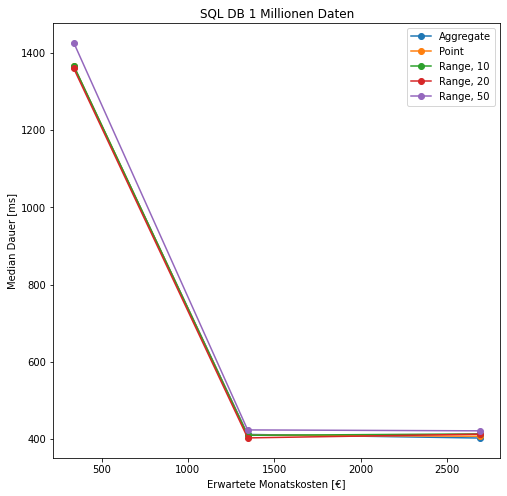

In [23]:
df_1Mil.groupby('QueryType')['Median'].plot(marker='o', legend=True, xlabel='Erwartete Monatskosten [€]', ylabel='Median Dauer [ms]', figsize=(8,8),  title= 'SQL DB 1 Millionen Daten')
plt.savefig('./Plots/SQLDB_1Mil.png', bbox_inches='tight')

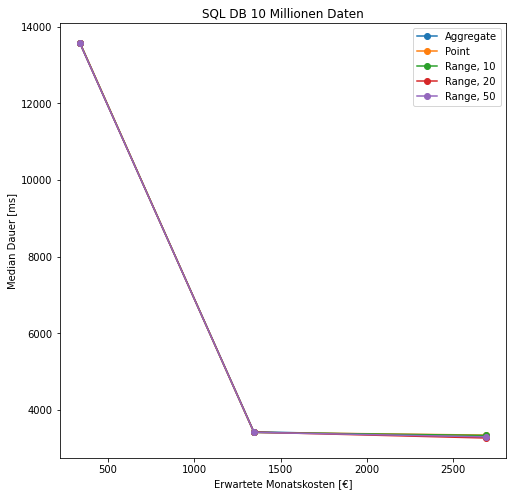

In [24]:
df_10Mil.groupby('QueryType')['Median'].plot(marker='o',  legend=True, xlabel='Erwartete Monatskosten [€]',ylabel='Median Dauer [ms]', figsize=(8,8),  title= 'SQL DB 10 Millionen Daten')
plt.savefig('./Plots/SQLDB_10Mil.png', bbox_inches='tight')

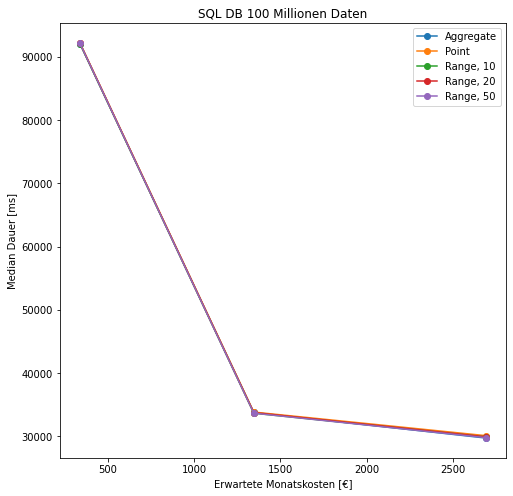

In [25]:
df_100Mil.groupby('QueryType')['Median'].plot(marker='o',  legend=True, xlabel='Erwartete Monatskosten [€]',ylabel='Median Dauer [ms]', figsize=(8,8), title= 'SQL DB 100 Millionen Daten')
plt.savefig('./Plots/SQLDB_100Mil.png', bbox_inches='tight')

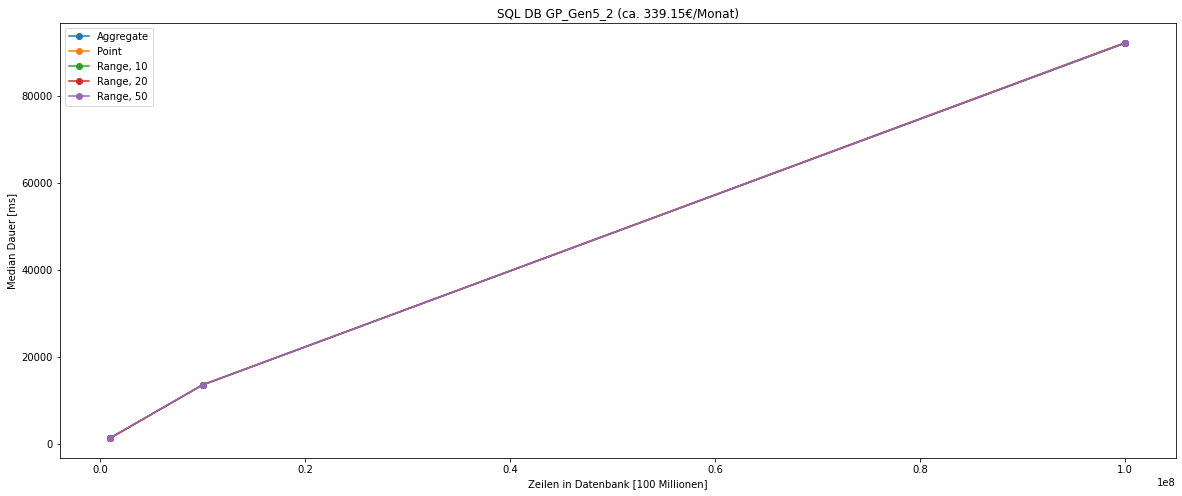

In [26]:
df_GP_Gen5_2.groupby('QueryType')['Median'].plot(marker='o',  legend=True, xlabel='Zeilen in Datenbank [100 Millionen]', ylabel='Median Dauer [ms]', figsize=(20,8), title= 'SQL DB GP_Gen5_2 (ca. 339.15€/Monat)')
plt.savefig('./Plots/SQLDB_GP_Gen5_2.png', bbox_inches='tight')

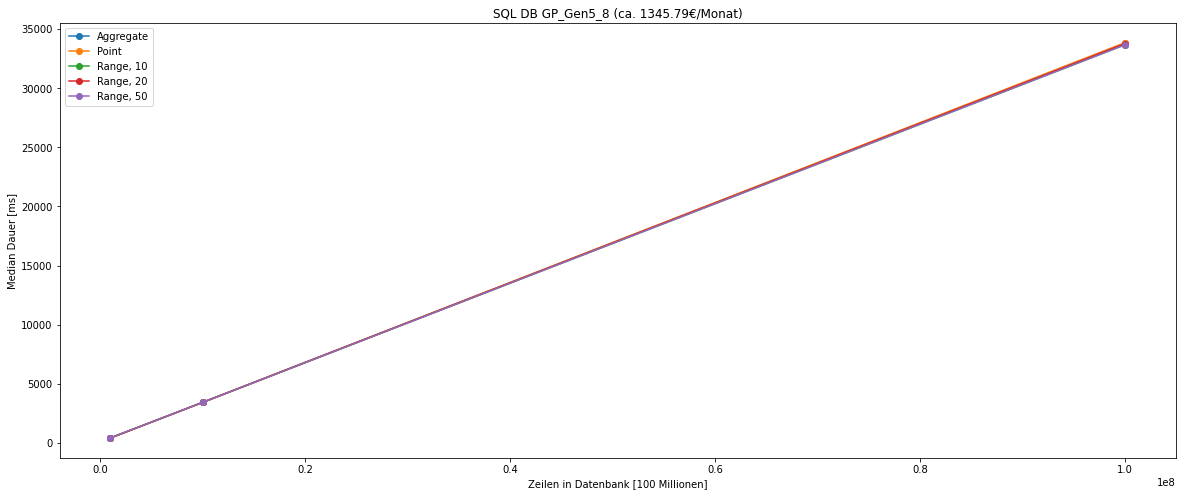

In [27]:
df_GP_Gen5_8.groupby('QueryType')['Median'].plot(marker='o',  legend=True, xlabel='Zeilen in Datenbank [100 Millionen]', ylabel='Median Dauer [ms]', figsize=(20,8), title= 'SQL DB GP_Gen5_8 (ca. 1345.79€/Monat)')
plt.savefig('./Plots/SQLDB_GP_Gen5_8.png', bbox_inches='tight')

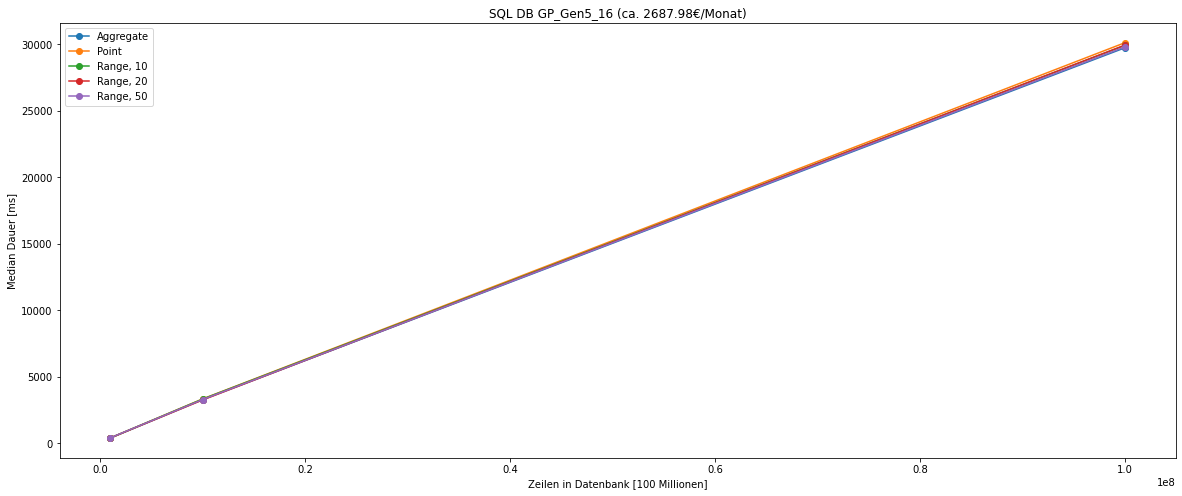

In [28]:
df_GP_Gen5_16.groupby('QueryType')['Median'].plot(marker='o',  legend=True, xlabel='Zeilen in Datenbank [100 Millionen]', ylabel='Median Dauer [ms]', figsize=(20,8), title= 'SQL DB GP_Gen5_16 (ca. 2687.98€/Monat)')
plt.savefig('./Plots/SQLDB_GP_Gen5_16.png', bbox_inches='tight')